In [2]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

#FROM the sample data of one day to conacatinate all the csv files of each hour into a single one

directory = '/Users/thomas/Desktop/Desktop/phd_unipv/Industrial_PhD/Data/20241126/csv_acc'

one_hr_datframes= []

for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        
        df = pd.read_csv(file_path, sep=';')

        df_campate = df[['time', '0309101E_x', '030910F6_x', '0309100F_x', '03091200_x', '030911EF_x', '030911FF_x']]

        one_hr_datframes.append(df_campate)

#dataframe file conatining one day data 
master_df = pd.concat(one_hr_datframes, ignore_index=True)


In [3]:

#converting the one day dataframe to a single csv file
master_df.to_csv('master_file_day.csv', index= False)

#converting time column to datetime to recognise the dates
master_df['time'] = pd.to_datetime(master_df['time'], format='%Y/%m/%d %H:%M:%S:%f')

In [4]:
master_df.info()
master_df = master_df.set_index('time') #setting the time column as the index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   time        datetime64[ns]
 1   0309101E_x  float64       
 2   030910F6_x  float64       
 3   0309100F_x  float64       
 4   03091200_x  float64       
 5   030911EF_x  float64       
 6   030911FF_x  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 461.4 MB


In [5]:

df_by_min = master_df.resample('T').mean()
df_by_sec = master_df.resample('S').mean()
df_by_min.info()
df_by_sec.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440 entries, 2024-11-26 00:00:00 to 2024-11-26 23:59:00
Freq: T
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0309101E_x  1439 non-null   float64
 1   030910F6_x  1439 non-null   float64
 2   0309100F_x  1439 non-null   float64
 3   03091200_x  1439 non-null   float64
 4   030911EF_x  1439 non-null   float64
 5   030911FF_x  1439 non-null   float64
dtypes: float64(6)
memory usage: 78.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86400 entries, 2024-11-26 00:00:00 to 2024-11-26 23:59:59
Freq: S
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0309101E_x  86233 non-null  float64
 1   030910F6_x  86233 non-null  float64
 2   0309100F_x  86233 non-null  float64
 3   03091200_x  86233 non-null  float64
 4   030911EF_x  86233 non-null  float64
 5   030911FF_x  86233 non-null  float64
dt

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

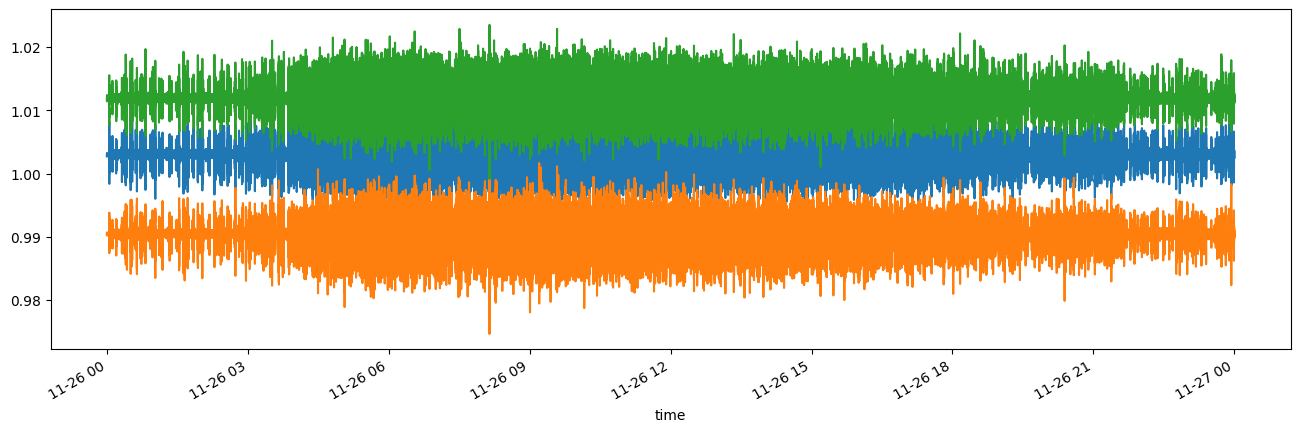

In [20]:
master_df['0309101E_x'].plot(figsize=(16,5))
master_df['030910F6_x'].plot(figsize=(16,5))
master_df['0309100F_x'].plot(figsize=(16,5))


<AxesSubplot: xlabel='time'>

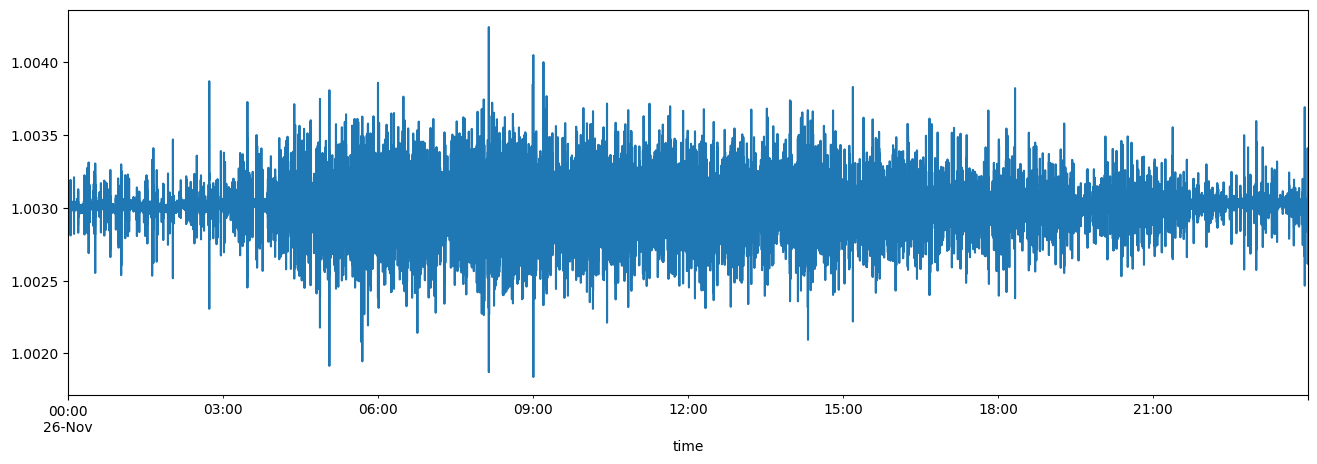

In [7]:
df_by_sec['0309101E_x'].plot(figsize=(16,5))

<AxesSubplot: xlabel='time'>

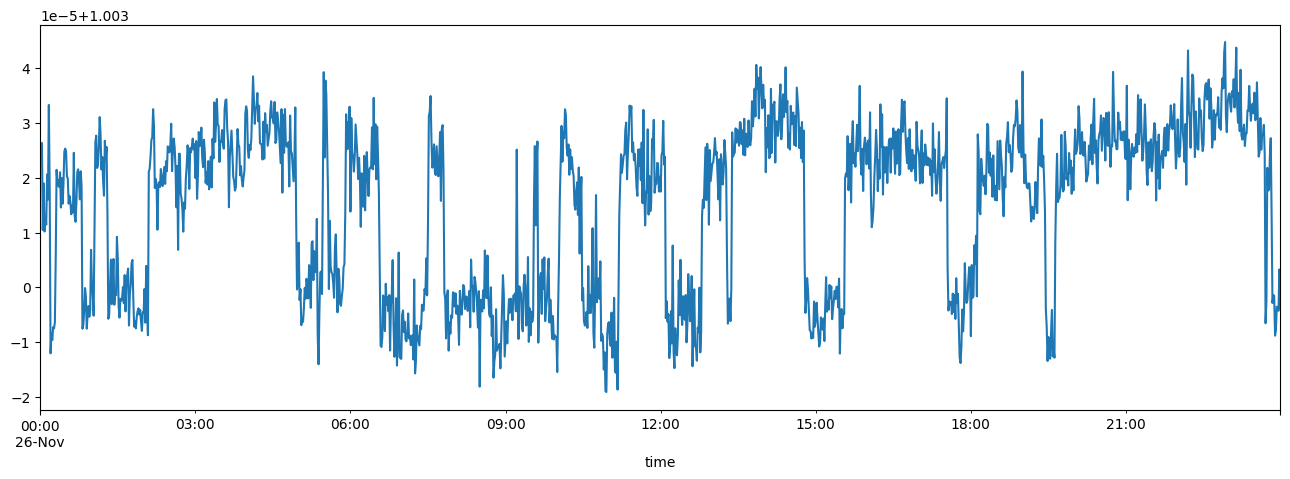

In [8]:
df_by_min['0309101E_x'].plot(figsize=(16,5))

In [9]:

# Plot time-series data for selected sensors of one campate
sensors = ['0309101E_x', '030910F6_x', '0309100F_x', '03091200_x', '030911EF_x', '030911FF_x']

sensors_left_campate = ['0309101E_x', '030910F6_x', '0309100F_x'] # Replace with desired columns

sensors_right_campate = ['03091200_x', '030911EF_x', '030911FF_x'] # Replace with desired columns

sensor_names = ['AICD 051', 'AICD 052', 'AICD 053', 'AICD 104', 'AICD 105', 'AICD 106']

campate_sensors = dict(zip(sensor_names, sensors))


for key, value in campate_sensors.items():
    print(key,':', value)


AICD 051 : 0309101E_x
AICD 052 : 030910F6_x
AICD 053 : 0309100F_x
AICD 104 : 03091200_x
AICD 105 : 030911EF_x
AICD 106 : 030911FF_x


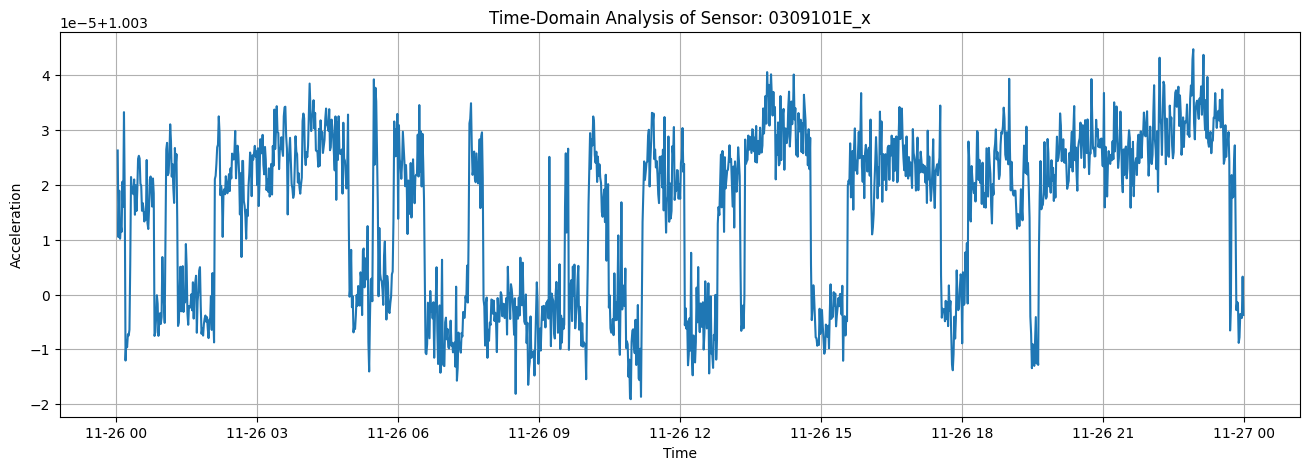

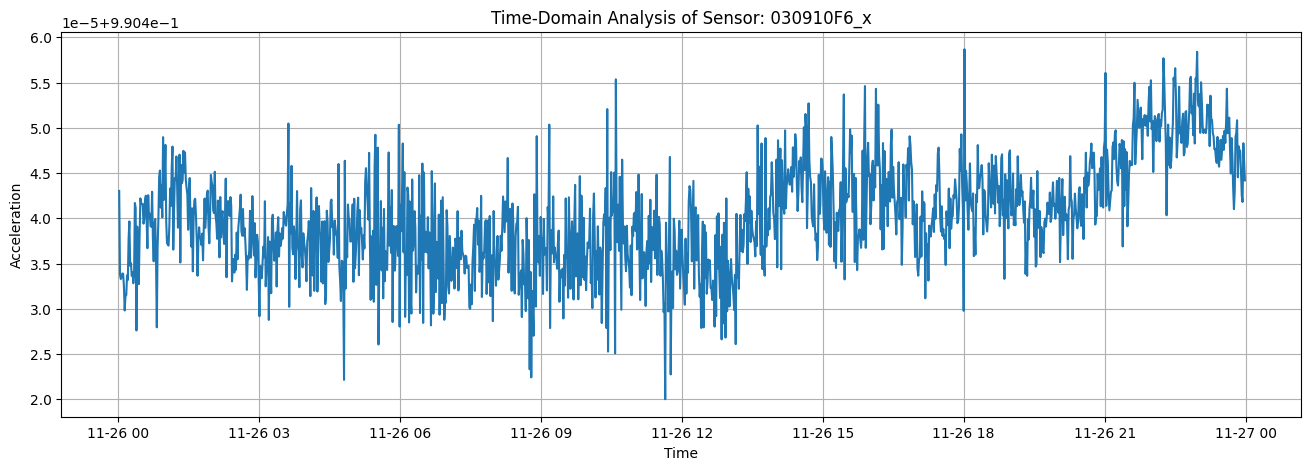

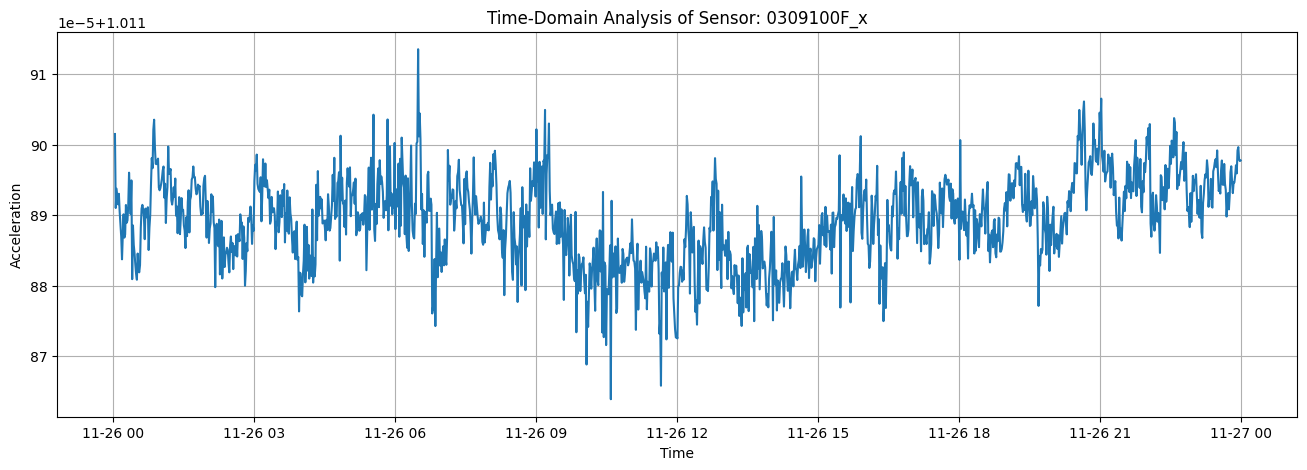

In [10]:
for sensor in sensors_left_campate:
    plt.figure(figsize=(16, 5))
    plt.plot(df_by_min.index, df_by_min[sensor])
    plt.title(f"Time-Domain Analysis of Sensor: {sensor}")
    plt.xlabel("Time")
    plt.ylabel("Acceleration")
    plt.grid()
    plt.savefig(f"sensor_{sensor}.png")
    plt.show()

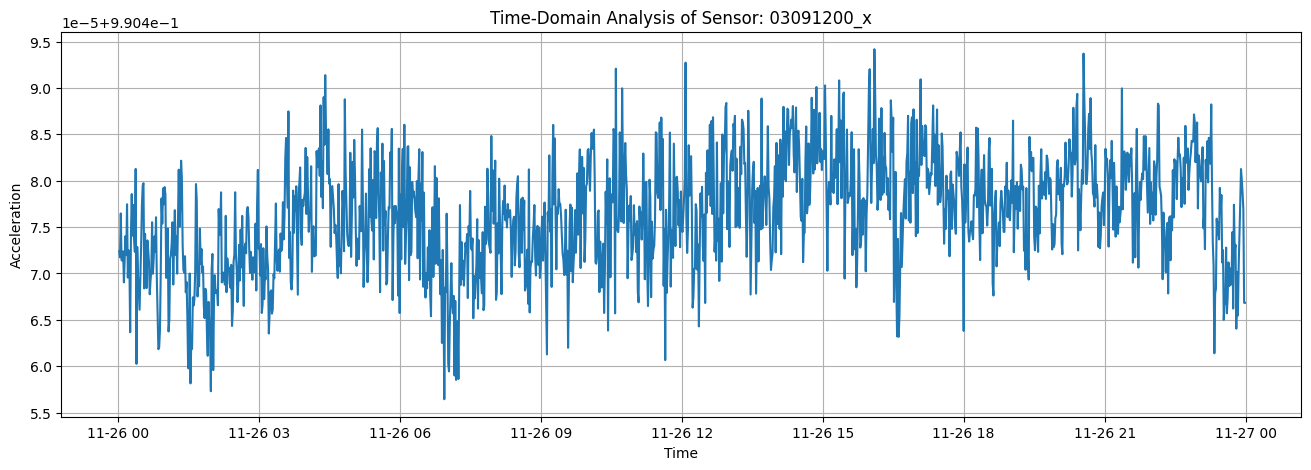

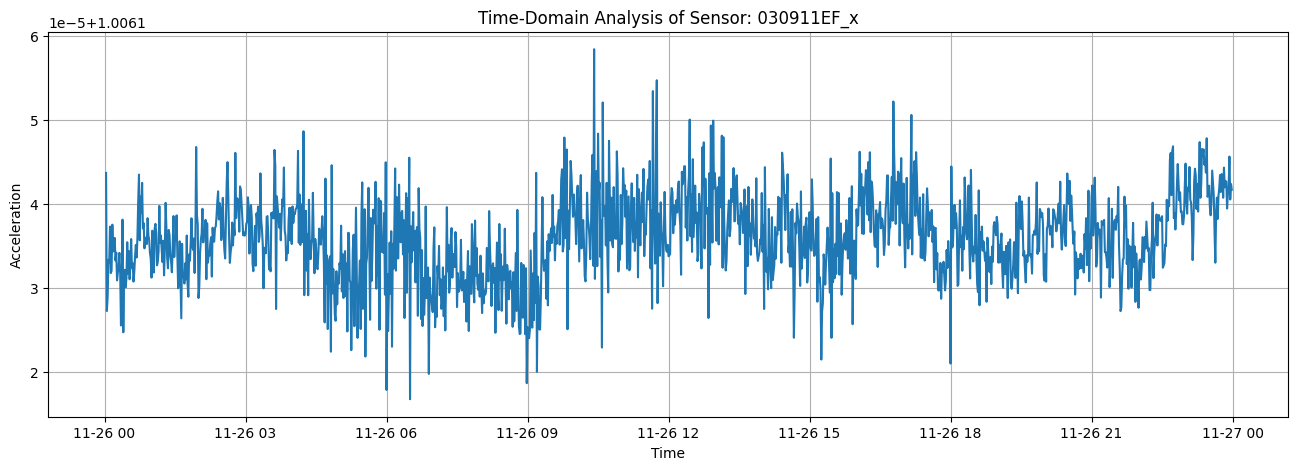

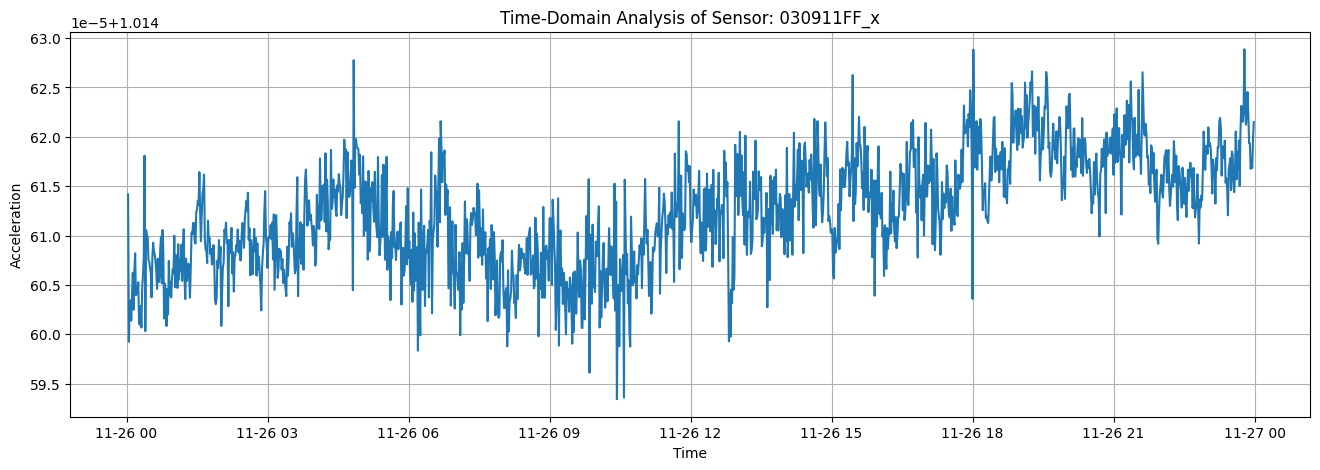

In [11]:
for sensor in sensors_right_campate:
    plt.figure(figsize=(16, 5))
    plt.plot(df_by_min.index, df_by_min[sensor])
    plt.title(f"Time-Domain Analysis of Sensor: {sensor}")
    plt.xlabel("Time")
    plt.ylabel("Acceleration")
    plt.grid()
    plt.savefig(f"sensor_{sensor}.png")
    plt.show()

In [12]:
import plotly.express as px

output_dir = '/Users/thomas/Desktop/Desktop/github_repos/industry_time_series/'

# Loop through each sensor and create a separate plot
for sensor in sensors:
    fig = px.line(
        df_by_min, 
        x=df_by_min.index, 
        y=sensor, 
        title=f"Time-Domain Analysis of Sensor: {sensor}",
        labels={"x": "Time", "y": "Acceleration"}
    )
    fig.update_layout(title_x=0.5)  # Center the title
    fig.show()

    filename = f"{output_dir}sensor_{sensor}.png"
    #fig.write_image(filename)
    print(f"Saved: {filename}")

for key, value in campate_sensors.items():
    print(key,':', value)
    

Saved: /Users/thomas/Desktop/Desktop/github_repos/industry_time_series/sensor_0309101E_x.png


Saved: /Users/thomas/Desktop/Desktop/github_repos/industry_time_series/sensor_030910F6_x.png


Saved: /Users/thomas/Desktop/Desktop/github_repos/industry_time_series/sensor_0309100F_x.png


Saved: /Users/thomas/Desktop/Desktop/github_repos/industry_time_series/sensor_03091200_x.png


Saved: /Users/thomas/Desktop/Desktop/github_repos/industry_time_series/sensor_030911EF_x.png


Saved: /Users/thomas/Desktop/Desktop/github_repos/industry_time_series/sensor_030911FF_x.png
AICD 051 : 0309101E_x
AICD 052 : 030910F6_x
AICD 053 : 0309100F_x
AICD 104 : 03091200_x
AICD 105 : 030911EF_x
AICD 106 : 030911FF_x


In [13]:
# Compute FFT for a selected sensor
sensor = '0309101E_x'

signal = master_df[sensor].dropna()

# Preprocess the data (detrending)
signal = signal - signal.mean()
signal = signal.values


n = len(signal)
freq = np.fft.fftfreq(n, d=0.01)  # Assuming 0.01s sampling interval (10ms)
fft_values = np.abs(np.fft.fft(signal))

# Keep only positive frequencies
positive_freqs = freq[:n // 2]
positive_amplitudes= (fft_values[:n // 2])

print(positive_freqs[:10], positive_amplitudes[:10])

[0.00000000e+00 1.15964886e-05 2.31929772e-05 3.47894657e-05
 4.63859543e-05 5.79824429e-05 6.95789315e-05 8.11754201e-05
 9.27719087e-05 1.04368397e-04] [6.86391055e-10 1.47660344e+01 1.20481765e+01 1.50191866e+01
 1.94333015e+01 1.54736329e+01 2.65292311e+00 2.29788874e+01
 2.50811263e+01 1.82279681e+01]


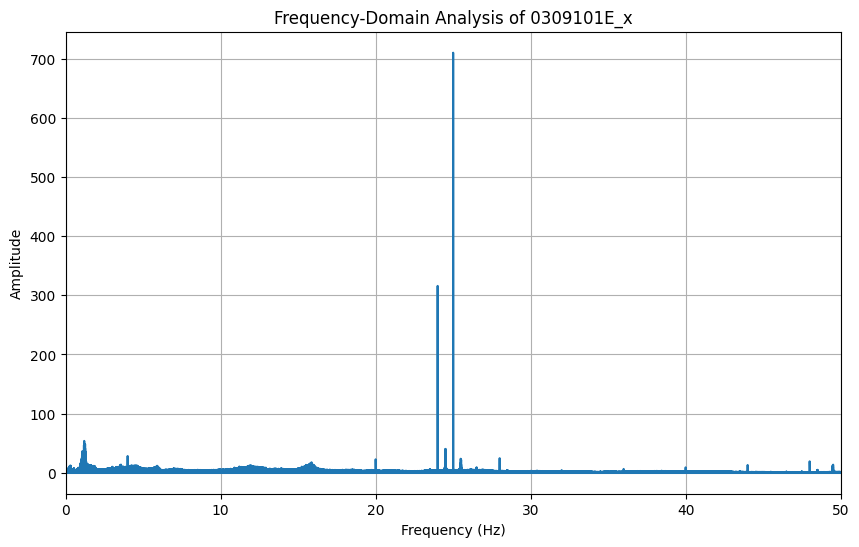

In [19]:
max_frequency = 50
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_amplitudes)
plt.title(f"Frequency-Domain Analysis of {sensor}")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, max_frequency)  # Set max_frequency to an appropriate value
plt.grid()
plt.savefig("freq_domain_analysis_0309101E_x.png")
plt.show()

In [15]:
# Check for NaN or Infinite values
print(master_df.isnull().sum())  # Count NaNs
print(np.isinf(master_df[sensor]).sum())  # Count infinite values


0309101E_x    16700
030910F6_x    16700
0309100F_x    16700
03091200_x    16700
030911EF_x    16700
030911FF_x    16700
dtype: int64
0


In [ ]:
fft_df = pd.DataFrame({'Frequency': positive_freqs, 'Amplitude': positive_amplitudes})

fig = px.line(fft_df, x='Frequency', y='Amplitude', title=f"Frequency-Domain Analysis of {sensor}")
fig.update_layout(xaxis_title="Frequency (Hz)", yaxis_title="Amplitude")
fig.show()